In [76]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.wcs import WCS
import pyregion
from copy import copy

In [2]:
hdul = fits.open('/Users/arpita/Documents/APL_NEW/smacs0723_F814W_moduleB_WCS.fits')
hdu = hdul[0]
data = hdul[0].data
hdr = hdul[0].header
wcs = WCS(hdr).celestial
hdul.close()

In [3]:
r = pyregion.open('/Users/arpita/Documents/APL_NEW/I1.reg')

In [4]:
print(data)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [5]:
r

[Shape : text ( Number(110.8593333),Number(-73.4491639) ),
 Shape : polygon ( Number(110.8594617),Number(-73.4491754),Number(110.8594685),Number(-73.4491699),Number(110.8594807),Number(-73.4491681),Number(110.8594891),Number(-73.4491643),Number(110.8594807),Number(-73.4491616),Number(110.8594760),Number(-73.4491588),Number(110.8594717),Number(-73.4491532),Number(110.8594611),Number(-73.4491488),Number(110.8594416),Number(-73.4491493),Number(110.8594328),Number(-73.4491477),Number(110.8594313),Number(-73.4491421),Number(110.8594392),Number(-73.4491365),Number(110.8594359),Number(-73.4491310),Number(110.8594298),Number(-73.4491254),Number(110.8594221),Number(-73.4491243),Number(110.8594137),Number(-73.4491254),Number(110.8594026),Number(-73.4491278),Number(110.8593850),Number(-73.4491310),Number(110.8593831),Number(-73.4491313),Number(110.8593636),Number(-73.4491327),Number(110.8593441),Number(-73.4491313),Number(110.8593412),Number(-73.4491310),Number(110.8593246),Number(-73.4491270),Nu

In [6]:
r[1].coord_list

[110.8594617,
 -73.4491754,
 110.8594685,
 -73.4491699,
 110.8594807,
 -73.4491681,
 110.8594891,
 -73.4491643,
 110.8594807,
 -73.4491616,
 110.859476,
 -73.4491588,
 110.8594717,
 -73.4491532,
 110.8594611,
 -73.4491488,
 110.8594416,
 -73.4491493,
 110.8594328,
 -73.4491477,
 110.8594313,
 -73.4491421,
 110.8594392,
 -73.4491365,
 110.8594359,
 -73.449131,
 110.8594298,
 -73.4491254,
 110.8594221,
 -73.4491243,
 110.8594137,
 -73.4491254,
 110.8594026,
 -73.4491278,
 110.859385,
 -73.449131,
 110.8593831,
 -73.4491313,
 110.8593636,
 -73.4491327,
 110.8593441,
 -73.4491313,
 110.8593412,
 -73.449131,
 110.8593246,
 -73.449127,
 110.8593051,
 -73.4491288,
 110.8592933,
 -73.449131,
 110.8592856,
 -73.4491345,
 110.8592817,
 -73.4491366,
 110.8592807,
 -73.4491421,
 110.8592856,
 -73.4491431,
 110.8592893,
 -73.4491477,
 110.8592942,
 -73.4491532,
 110.8592872,
 -73.4491588,
 110.8592925,
 -73.4491643,
 110.8592988,
 -73.4491699,
 110.8593052,
 -73.4491738,
 110.8593247,
 -73.4491715,

In [7]:
r2 = r.as_imagecoord(hdr)

In [8]:
r2[0].coord_list

[2329.0575677867896, 3783.7518290520843]

In [9]:
j,i = np.round(wcs.wcs_world2pix(110.8240396,-73.4516238,1)).astype(int)

In [10]:
# wcs.wcs_pix2world(6465.998518,7123.36138546,1)

In [11]:
patch_list, artist_list = r2.get_mpl_patches_texts()

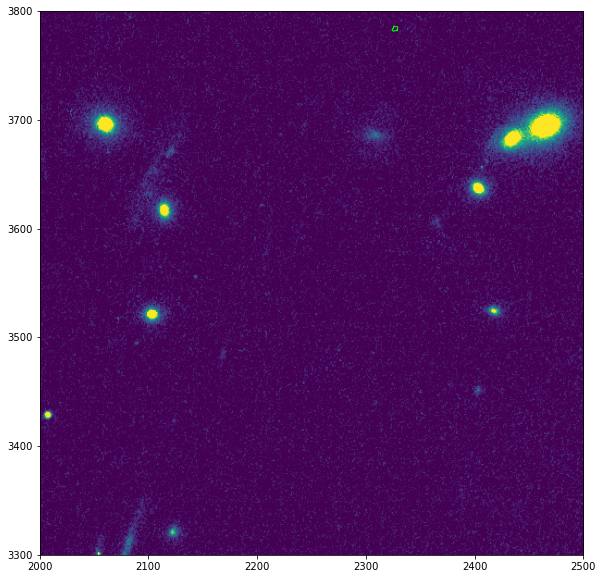

In [12]:
plt.figure(figsize=(10,10))
ax=plt.gca()
plt.imshow(data,vmin=0,vmax=1.5,origin='lower')
for p in patch_list:    
    ax.add_patch(copy(p))
plt.xlim(2000,2500)
plt.ylim(3300,3800)
plt.show()

In [13]:
mymask = r2.get_mask(hdu=hdu,shape=data.shape)

/Users/arpita/opt/anaconda3/lib/python3.9/site-packages/pyregion/region_to_filter.py:108: UserWarning: 'as_region_filter' does not know how to convert text to a region filter.
  warnings.warn("'as_region_filter' does not know how to convert {0}"


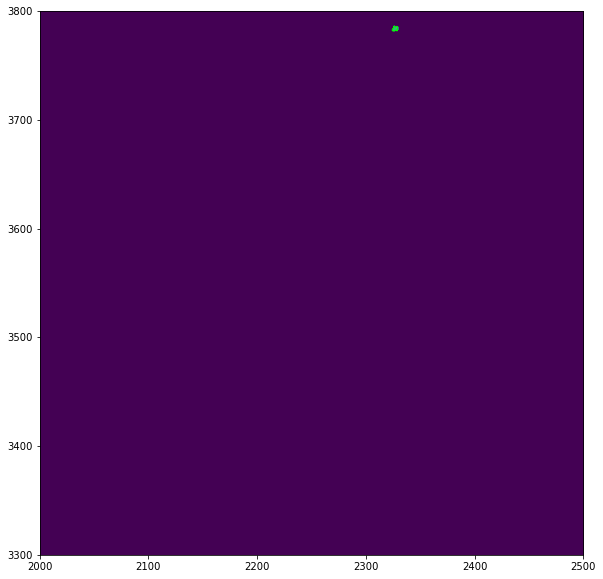

In [14]:
patch_list, artist_list = r2.get_mpl_patches_texts()

plt.figure(figsize=(10,10))
ax=plt.gca()
plt.imshow(mymask,vmin=0,vmax=1.5,origin='lower')
for p in patch_list:
    ax.add_patch(copy(p))
plt.xlim(2000,2500)
plt.ylim(3300,3800)
plt.show()

In [15]:
np.sum(data[mymask])

-0.7632756

In [16]:
hdul = fits.open('/Users/arpita/Downloads/ampli 2/mu_map_I1.1.fits')
hdu_ampli = hdul[0]
data_ampli = hdul[0].data
hdr_ampli = hdul[0].header
wcs_ampli = WCS(hdr_ampli).celestial
hdul.close()

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [17]:
r2_ampli = r.as_imagecoord(hdr_ampli)

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]


In [18]:
r2_ampli[1]

Shape : polygon ( Number(110.8594617),Number(-73.4491754),Number(110.8594685),Number(-73.4491699),Number(110.8594807),Number(-73.4491681),Number(110.8594891),Number(-73.4491643),Number(110.8594807),Number(-73.4491616),Number(110.8594760),Number(-73.4491588),Number(110.8594717),Number(-73.4491532),Number(110.8594611),Number(-73.4491488),Number(110.8594416),Number(-73.4491493),Number(110.8594328),Number(-73.4491477),Number(110.8594313),Number(-73.4491421),Number(110.8594392),Number(-73.4491365),Number(110.8594359),Number(-73.4491310),Number(110.8594298),Number(-73.4491254),Number(110.8594221),Number(-73.4491243),Number(110.8594137),Number(-73.4491254),Number(110.8594026),Number(-73.4491278),Number(110.8593850),Number(-73.4491310),Number(110.8593831),Number(-73.4491313),Number(110.8593636),Number(-73.4491327),Number(110.8593441),Number(-73.4491313),Number(110.8593412),Number(-73.4491310),Number(110.8593246),Number(-73.4491270),Number(110.8593051),Number(-73.4491288),Number(110.8592933),Nu

In [19]:
patch_list_ampli, artist_list_ampli = r2_ampli.get_mpl_patches_texts()

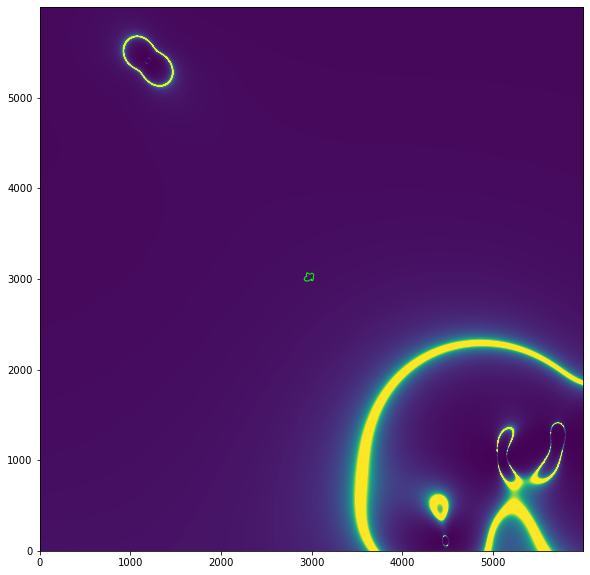

In [20]:
plt.figure(figsize=(10,10))
ax=plt.gca()
plt.imshow(data_ampli,vmin=0,vmax=100,origin='lower')
for p in patch_list_ampli:    
    ax.add_patch(copy(p))
    
plt.show()

In [21]:
mymask_ampli = r2_ampli.get_mask(hdu=hdu_ampli,shape=data_ampli.shape)

/Users/arpita/opt/anaconda3/lib/python3.9/site-packages/pyregion/region_to_filter.py:108: UserWarning: 'as_region_filter' does not know how to convert text to a region filter.
  warnings.warn("'as_region_filter' does not know how to convert {0}"


In [22]:
np.mean(data_ampli[mymask_ampli])

3.9981804

In [23]:
# wcs_ampli

In [24]:
j_ampli,i_ampli= np.round(wcs_ampli.wcs_world2pix(110.8594617,-73.4491754,1)).astype(int)

In [25]:
# for i in variable:
#     var = []
#     cor = np.float(i)
#     var.append(cor)
    
# print(var)

In [26]:
data[i,j]

0.067799516

In [27]:
data_ampli[i_ampli, j_ampli]

4.013761

In [28]:
data[i,j]/data_ampli[i_ampli, j_ampli]

0.016891766

In [29]:
r[1].coord_list

[110.8594617,
 -73.4491754,
 110.8594685,
 -73.4491699,
 110.8594807,
 -73.4491681,
 110.8594891,
 -73.4491643,
 110.8594807,
 -73.4491616,
 110.859476,
 -73.4491588,
 110.8594717,
 -73.4491532,
 110.8594611,
 -73.4491488,
 110.8594416,
 -73.4491493,
 110.8594328,
 -73.4491477,
 110.8594313,
 -73.4491421,
 110.8594392,
 -73.4491365,
 110.8594359,
 -73.449131,
 110.8594298,
 -73.4491254,
 110.8594221,
 -73.4491243,
 110.8594137,
 -73.4491254,
 110.8594026,
 -73.4491278,
 110.859385,
 -73.449131,
 110.8593831,
 -73.4491313,
 110.8593636,
 -73.4491327,
 110.8593441,
 -73.4491313,
 110.8593412,
 -73.449131,
 110.8593246,
 -73.449127,
 110.8593051,
 -73.4491288,
 110.8592933,
 -73.449131,
 110.8592856,
 -73.4491345,
 110.8592817,
 -73.4491366,
 110.8592807,
 -73.4491421,
 110.8592856,
 -73.4491431,
 110.8592893,
 -73.4491477,
 110.8592942,
 -73.4491532,
 110.8592872,
 -73.4491588,
 110.8592925,
 -73.4491643,
 110.8592988,
 -73.4491699,
 110.8593052,
 -73.4491738,
 110.8593247,
 -73.4491715,

In [80]:
len(r)

2

In [64]:
# r2_ampli[1].coord_list

In [62]:
# for i in r[1].coord_list,l in r2_ampli[1].coord_list :
#     xw = r[i]
#     yw = r[i+1]
jw,iw = np.round(wcs.wcs_world2pix(xw,yw,c)).astype(int)
print
# #     j_ampli,i_ampli= np.round(wcs_ampli.wcs_world2pix(l,l+1,k)).astype(int)
     
# #     data[iw,jw]/data_ampli[i_ampli, j_ampli]

In [63]:
# len(r2_ampli)

In [61]:
# r2_ampli[1].coord_list

In [100]:
w = np.array(r[1].coord_list)
c = len(w)
q=0
i=1
for q in range(1,c-1,2) :
    x,y= w[q],w[q+1]
    jw,iw = np.round(wcs.wcs_world2pix(x,y,1)).astype(int)
    p= data[iw,jw]
    print(p)
   


IndexError: index -9223372036854775808 is out of bounds for axis 0 with size 6801

In [ ]:
# w=np.array(r[1].coord_list)

In [83]:
# print (w)